# We're going to play with very simple layer ANNs. Even with just one layer we'll be able to do some fun stuff!

In [70]:
import numpy as np
from matplotlib import pyplot

## This is our activation function, just a simple sigmoidal curve called the logistic function

In [71]:
def logistic_func(x):
    return 1/(1+np.exp(-x))

Let's take a look at the logistic function by plotting in in the range of -10 to 10 using this handy built-in numpy function *linspace*. This function takes the lower bound, the upper bound, and the number of values, and returns a *linearly spaced* vector including the lower and upper bounds. **Neat!**

In [72]:
x = np.linspace(-10, 10,20)
print(x)

[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


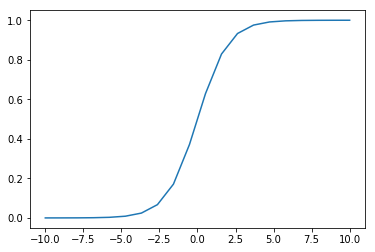

In [73]:
#Now plot it!
pyplot.plot(x, logistic_func(x))
pyplot.show()

## Let's try to make a simple network that generates the following truth table

| Input 1 | Output |
|---------|--------|
| 0       | 0      |
| 1       | 1      |

In [74]:
# Since we're only using one value, our input
# is a single value
input_vector = np.array([1])
input_weights = np.array([5])

# because we're using numpy arrays, when we do multiplication
# it will automatically perform it element-by-element
input_x_weights = input_vector * input_weights
neuron_sum = sum(input_x_weights)

# Now apply our activation function to the 
# sum of the inputs*weights vector
activation = logistic_func(neuron_sum)

print(activation)

0.993307149076


In [75]:
# Since we're only using one value, our input
# is a single value
input_vector = np.array([0])
input_weights = np.array([5])

# because we're using numpy arrays, when we do multiplication
# it will automatically perform it element-by-element
input_x_weights = input_vector * input_weights
neuron_sum = sum(input_x_weights)
activation = logistic_func(neuron_sum)

print(activation)

0.5


## Hmm, we're going to have a hard time multipling 0 by something to get a lower value...
To fix this problem, we use something called a **bias node**. Basically, we give the neural network a constant value to use for situations exactly like this. This is typically set at 1, though -1 is also a common choice. 

In [76]:
# Now we're passing in a bias node with value set to 1
# so we'll also have to give it's synapse a weight!
input_vector = np.array([0, 1])

# I just picked a few big values that will pull the 
# logistic function close to either 0 or 1 depending on
# the value of the input. 
input_weights = np.array([6, -3])

# because we're using numpy arrays, when we do multiplication
# it will automatically perform it element-by-element
input_x_weights = input_vector * input_weights
neuron_sum = sum(input_x_weights)
activation = logistic_func(neuron_sum)

print(activation)

0.0474258731776


## We can shorten this a lot using some nice numpy built in functions!

In [77]:
input_vector = np.array([0, 1])
input_weights = np.array([6, -3])

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
# numpy's dot function computes the inner product 
# e.g., [a,b].[c,d] = [a*c + b*d]
activation = logistic_func(np.dot(input_vector, input_weights))
print(activation)

0.0474258731776


# 1. Try your hand at choosing weights for a network that can compute this function

| Input 1 | Output |
|---------|--------|
| 0       | 1      |
| 1       | 0      |

# 2. Let's make it a bit more complex and add a second input!

| Input 1 | Input 2 | Output |
|---------|---------|--------|
| 0       | 0       | 0      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 1      |


## You should make sure your weights handle all the possible binary inputs we can give this function -- like the following input vectors!

In [82]:
input_vector = np.array([0, 0, 1])
input_vector = np.array([0, 1, 1])
input_vector = np.array([1, 0, 1])
input_vector = np.array([1, 1, 1])


## 3. What would you have to do if we wanted to have more than one output?
Let's try to replicate the following truth table (i.e., mirror the bits)

| Input 1 | Input 2 | Output 1 | Output 2 |
|---------|---------|----------|----------|
| 0       | 0       | 0        | 0        |
| 0       | 1       | 1        | 0        |
| 1       | 0       | 0        | 1        |
| 1       | 1       | 1        | 1        |

### NOTE: Because now each input node has more than one output node to connect to, we'll need more weights. 

#### We can store these weights as a matrix with 3 rows (one for each input plus the bias) and 2 columsn (one for each output). Thus, each value is a weight from the row's input node to the column's output node. 



In [81]:
input_vector = np.array([1, 0, 1])

#TODO: You'll have to change these weights! 
input_weights = np.array( [[1, 1],
                           [1, 1],
                           [1, 1]])


# https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
# we get to take advantage of more numpy fancyness here,
# when np.dot is given a matrix, it performs matrix multiplication!
activation = logistic_func(np.dot(input_vector, input_weights))
print(np.round(activation, decimals=3))

[ 0.881  0.881]


### You'll want to check all the possible combinations of 2-bit inputs again, like you did in Question 3. 

# 4. If you're feeling brave, try your hand at this one.
Hint: It's not as simple as it looks... You'll need more **layers** for this one!

| Input 1 | Input 2 | Output |
|---------|---------|--------|
| 0       | 0       | 0      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 0      |
